# EDA

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## En la Bici Bike Data

In [15]:
bikes_df = pd.read_csv('../data/enlabici-mend.csv')
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     22 non-null     object 
 1   latitude         22 non-null     float64
 2   longitude        22 non-null     float64
 3   bikes_available  22 non-null     int64  
 4   bikes_taken      22 non-null     int64  
 5   date_of_data     22 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ KB


In [16]:
bikes_df

,station_name,latitude,longitude,bikes_available,bikes_taken,date_of_data
0,Cultural,-32.884090,-68.848970,7,0,2023-12-04T22:31:13.871000Z
1,Plaza Independencia,-32.889500,-68.846000,17,0,2023-12-04T22:31:13.883000Z
2,Muni,-32.897942,-68.842463,7,0,2023-12-04T22:31:13.884000Z
3,Terminal,-32.893822,-68.829655,2,0,2023-12-04T22:31:13.885000Z
4,Benegas,-32.952390,-68.853749,10,0,2023-12-04T22:31:13.886000Z
5,Chacabuco,-32.916315,-68.851184,4,0,2023-12-04T22:31:13.888000Z
6,Pescarmona,-32.922855,-68.839564,5,0,2023-12-04T22:31:13.892000Z
7,Parque Lineal,-32.870624,-68.843329,8,0,2023-12-04T22:31:13.893000Z
8,EA Aristides,-32.891200,-68.860200,4,12,2023-12-04T22:31:13.900000Z
9,EA Muni,-32.898100,-68.843100,1,2,2023-12-04T22:31:13.901000Z


In [17]:
# Adding columns bikes_total, percent_avail, and percent_taken
bikes_df.insert(5, 'bikes_total', bikes_df['bikes_available'] + bikes_df['bikes_taken'])
bikes_df.insert(6, 'percent_avail', bikes_df['bikes_available']/bikes_df['bikes_total'])
bikes_df.insert(7, 'percent_taken', bikes_df['bikes_taken']/bikes_df['bikes_total'])

# Droppping column 'date_of_data' (date the station was updated on the citybikes.es site). 
# Information was already used to filter for 'open_at' parameter in API request.
bikes_df.drop(['date_of_data'], axis=1, inplace=True)
bikes_df

,station_name,latitude,longitude,bikes_available,bikes_taken,bikes_total,percent_avail,percent_taken
0,Cultural,-32.884090,-68.848970,7,0,7,1.000000,0.000000
1,Plaza Independencia,-32.889500,-68.846000,17,0,17,1.000000,0.000000
2,Muni,-32.897942,-68.842463,7,0,7,1.000000,0.000000
3,Terminal,-32.893822,-68.829655,2,0,2,1.000000,0.000000
4,Benegas,-32.952390,-68.853749,10,0,10,1.000000,0.000000
5,Chacabuco,-32.916315,-68.851184,4,0,4,1.000000,0.000000
6,Pescarmona,-32.922855,-68.839564,5,0,5,1.000000,0.000000
7,Parque Lineal,-32.870624,-68.843329,8,0,8,1.000000,0.000000
8,EA Aristides,-32.891200,-68.860200,4,12,16,0.250000,0.750000
9,EA Muni,-32.898100,-68.843100,1,2,3,0.333333,0.666667


In [18]:
bikes_df.to_csv('../data/bikes_df_eda.csv', index=False)

## Foursquare Data

In [19]:
foursq_df = pd.read_csv('../data/foursquare_df_orig.csv')
foursq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categories  320 non-null    object 
 1   distance    320 non-null    int64  
 2   name        320 non-null    object 
 3   popularity  320 non-null    float64
 4   price       264 non-null    float64
 5   rating      233 non-null    float64
 6   latitude    320 non-null    float64
 7   longitude   320 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 20.1+ KB


In [20]:
foursq_df.describe()

,distance,popularity,price,rating,latitude,longitude
count,320.000000,320.000000,264.000000,233.000000,320.000000,320.000000
mean,713.109375,0.857798,1.359848,7.395708,-32.902977,-68.845451
std,691.718856,0.238506,0.561145,0.941238,0.022603,0.008348
min,85.000000,0.024234,1.000000,5.100000,-32.957213,-68.860200
25%,471.000000,0.903525,1.000000,6.700000,-32.898100,-68.851200
50%,680.500000,0.964340,1.000000,7.500000,-32.893822,-68.845900
75%,851.750000,0.985434,2.000000,8.000000,-32.889500,-68.840700
max,7641.000000,0.998870,3.000000,8.900000,-32.870624,-68.829600


Based on the high-level stats:
* There are some large outliers in 'distance'. This shouldn't be the case since the radius was set to 1000m.
    * This post discusses Foursquare radius and limit which may help explain why some distances are greater than 1000m. My API request had a radius of 1000m and a limit of 20 (default is 10). This may be why some results are further than 1000m. These will need to be removed.
    
        https://stackoverflow.com/questions/65706575/foursquare-apis-venue-searching-method-priority-limit-vs-radius
* No obvious concerns with popularity, price, and rating
    * popularity has a scale from 0-1 (continuous); aligns with Foursquare description
    * price has a range from 1-3 (discrete); aligns with with Foursquare description of possible values 1-4
    * rating has a range from 5.1-8.9 (continuous); aligns with Foursquare description of possible values 0.0-9.0+

Foursquare Response Fields: https://location.foursquare.com/developer/reference/response-fields#core-data-fields

In [138]:
# Filter out rows from foursq_df where distance is less than or equal to 1000, put into fsdf_1 dataframe
fsdf_1 = foursq_df[foursq_df['distance'] <= 1000]
fsdf_1.describe()

,distance,popularity,price,rating,latitude,longitude
count,309.000000,309.000000,254.000000,227.000000,309.000000,309.000000
mean,638.669903,0.857024,1.374016,7.379295,-32.902618,-68.845430
std,242.171295,0.239541,0.567459,0.928775,0.022360,0.008322
min,85.000000,0.024234,1.000000,5.100000,-32.957213,-68.860200
25%,467.000000,0.904445,1.000000,6.700000,-32.898100,-68.851200
50%,673.000000,0.963963,1.000000,7.500000,-32.893822,-68.845900
75%,837.000000,0.985434,2.000000,8.000000,-32.889500,-68.840700
max,998.000000,0.998870,3.000000,8.900000,-32.870624,-68.829600


In [139]:
fsdf_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categories  309 non-null    object 
 1   distance    309 non-null    int64  
 2   name        309 non-null    object 
 3   popularity  309 non-null    float64
 4   price       254 non-null    float64
 5   rating      227 non-null    float64
 6   latitude    309 non-null    float64
 7   longitude   309 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 21.7+ KB


In [140]:
Q1_dist = foursq_df['distance'].quantile(0.25)
Q3_dist = foursq_df['distance'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
print('IQR =', IQR_dist)
print('Lower Limit =', Q1_dist - 1.5 * IQR_dist)
print('Upper Limit =', Q3_dist + 1.5 * IQR_dist)
fsdf_2 = fsdf_1[~((fsdf_1['distance'] < (Q1_dist - 1.5 * IQR_dist)) | (fsdf_1['distance'] > (Q3_dist + 1.5 * IQR_dist)))]
# fsdf_2.describe()

IQR = 380.75
Lower Limit = -100.125
Upper Limit = 1422.875


In [141]:
z_scores_dist = np.abs(stats.zscore(fsdf_1['distance']))
fsdf_2 = fsdf_1[(z_scores_dist <3)]
fsdf_2.describe()

,distance,popularity,price,rating,latitude,longitude
count,309.000000,309.000000,254.000000,227.000000,309.000000,309.000000
mean,638.669903,0.857024,1.374016,7.379295,-32.902618,-68.845430
std,242.171295,0.239541,0.567459,0.928775,0.022360,0.008322
min,85.000000,0.024234,1.000000,5.100000,-32.957213,-68.860200
25%,467.000000,0.904445,1.000000,6.700000,-32.898100,-68.851200
50%,673.000000,0.963963,1.000000,7.500000,-32.893822,-68.845900
75%,837.000000,0.985434,2.000000,8.000000,-32.889500,-68.840700
max,998.000000,0.998870,3.000000,8.900000,-32.870624,-68.829600


The 'rating' column has 227 non-null values out of 309, i.e. there are 82 nulls. Most of the other numeric columns such as distance and popularity have no nulls.

* Deleting the rows with missing 'rating' entirely would lose other useful data.
* Filling zeroes in place would bring down the average
* Since there's a slight left skew in 'rating', the median may be the better option for replacing null values in the rating column. 

The approach will be to group the data by latitude/longitude, so the median used to fill the null values will be the median for the group the null value falls into.

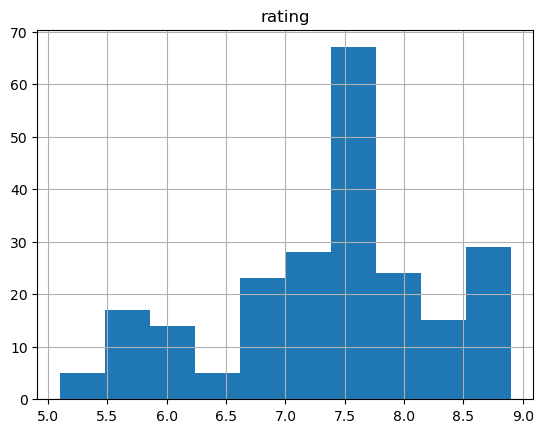

mean_rating= 7.379295154185022
median_rating 7.5
mode_rating= 7.7
skewness_rating= -0.38279874286512094


In [142]:
fsdf_2.hist(column='rating')
plt.show()
mean_rating = fsdf_2['rating'].mean()
median_rating = fsdf_2['rating'].median()
mode_rating = fsdf_2['rating'].mode()[0]
skewness_rating = fsdf_2['rating'].skew()
print('mean_rating=',mean_rating)
print('median_rating',median_rating)
print('mode_rating=',mode_rating)
print('skewness_rating=',skewness_rating)

This article discusses Foursquare radius and limit which may help explain why some distances are greater than 1000m.
https://stackoverflow.com/questions/65706575/foursquare-apis-venue-searching-method-priority-limit-vs-radius

Changes:
* Remove categories column
* Remove rows where distance is greater than 1000m
* groupby latitude/longitude and get value count of rows for each group
* get avg, max, min distance for each location
* get avg, max, min popularity for each location
* 

https://datatofish.com/round-values-pandas-dataframe/

In [143]:
# drop columns 'categories' and 'name' as they will not be used for further analysis to create fsdf_3 dataframe 
fsdf_3 = fsdf_2.drop(columns=['categories','name'], axis=1)

In [144]:
# handle nulls in 'rating' 
# Create a new DataFrame with only the rows where 'rating' is null

fsdf_null_ratings = fsdf_3[fsdf_3['rating'].isnull()].reset_index()
fsdf_null_ratings

,index,distance,popularity,price,rating,latitude,longitude
0,66,304,0.516575,1.0,NaN,-32.893822,-68.829655
1,67,553,0.736941,1.0,NaN,-32.893822,-68.829655
2,68,669,0.439101,1.0,NaN,-32.893822,-68.829655
3,69,675,0.569186,1.0,NaN,-32.893822,-68.829655
4,70,734,0.874184,1.0,NaN,-32.893822,-68.829655
...,...,...,...,...,...,...,...
77,315,797,0.501128,NaN,NaN,-32.924682,-68.842504
78,316,822,0.956247,1.0,NaN,-32.924682,-68.842504
79,317,850,0.248083,NaN,NaN,-32.924682,-68.842504
80,318,900,0.775113,1.0,NaN,-32.870709,-68.858351


In [145]:
# Calculating rating median for each longitude/latitude group separately, to join with fsdf_null_ratings
rating_medians = fsdf_3.groupby(['longitude','latitude'])['rating'].median()#.reset_index()
rating_medians

longitude   latitude  
-68.860200  -32.891200    7.40
-68.859185  -32.957213    7.30
-68.858351  -32.870709     NaN
-68.853749  -32.952390    7.30
-68.853741  -32.952424    7.30
-68.852796  -32.931894     NaN
-68.851200  -32.893700    7.75
-68.851184  -32.916315    7.40
-68.848970  -32.884090    7.70
-68.846000  -32.889500    7.75
-68.845900  -32.896100    7.65
-68.843329  -32.870624    5.70
-68.843200  -32.898100    6.70
-68.843100  -32.898100    6.70
-68.842504  -32.924682    6.50
-68.842463  -32.897942    6.80
-68.840700  -32.887100    7.65
-68.839564  -32.922855    6.50
-68.838700  -32.890700    7.50
-68.829655  -32.893822    6.15
-68.829600  -32.884700    5.65
Name: rating, dtype: float64

In [146]:
# Merge the 'fsdf_null_ratings' DataFrame with the 'rating_medians' DataFrame
fsdf_null_ratings_merged = pd.merge(fsdf_null_ratings, rating_medians, on=['longitude', 'latitude'], suffixes=('', '_median'))

# Merge 'fsdf_null_ratings' with 'rating_medians'
#fsdf_null_ratings_merged = fsdf_null_ratings.merge(rating_medians, left_index=True, on=['longitude', 'latitude'], suffixes=('', '_median'))

# # Fill the null values in the 'rating' column with the 'rating_median' column
fsdf_null_ratings_merged['rating'] = fsdf_null_ratings_merged['rating'].fillna(fsdf_null_ratings_merged['rating_median'])

# # Drop the 'rating_median' column
fsdf_null_ratings_merged = fsdf_null_ratings_merged.drop(columns=['rating_median'])
fsdf_null_ratings_merged

,index,distance,popularity,price,rating,latitude,longitude
0,66,304,0.516575,1.0,6.15,-32.893822,-68.829655
1,67,553,0.736941,1.0,6.15,-32.893822,-68.829655
2,68,669,0.439101,1.0,6.15,-32.893822,-68.829655
3,69,675,0.569186,1.0,6.15,-32.893822,-68.829655
4,70,734,0.874184,1.0,6.15,-32.893822,-68.829655
...,...,...,...,...,...,...,...
77,315,797,0.501128,NaN,6.50,-32.924682,-68.842504
78,316,822,0.956247,1.0,6.50,-32.924682,-68.842504
79,317,850,0.248083,NaN,6.50,-32.924682,-68.842504
80,318,900,0.775113,1.0,NaN,-32.870709,-68.858351


In [147]:
# rating values that are still NaN. This is because there were no ratings for any entry in the group.
still_null_ratings = fsdf_null_ratings_merged[fsdf_null_ratings_merged['rating'].isnull()]
still_null_ratings

,index,distance,popularity,price,rating,latitude,longitude
63,292,230,0.486243,2.0,NaN,-32.931894,-68.852796
64,293,555,0.248083,NaN,NaN,-32.931894,-68.852796
65,294,831,0.627424,NaN,NaN,-32.931894,-68.852796
66,295,933,0.656272,1.0,NaN,-32.931894,-68.852796
80,318,900,0.775113,1.0,NaN,-32.870709,-68.858351
81,319,927,0.645028,1.0,NaN,-32.870709,-68.858351


In [150]:
fsdf_4 = fsdf_3.copy().reset_index()
fsdf_4

,index,distance,popularity,price,rating,latitude,longitude
0,0,523,0.998870,3.0,8.9,-32.884090,-68.848970
1,1,895,0.991713,1.0,8.9,-32.884090,-68.848970
2,2,514,0.987067,1.0,8.8,-32.884090,-68.848970
3,3,865,0.944375,2.0,8.6,-32.884090,-68.848970
4,4,194,0.992843,3.0,8.5,-32.884090,-68.848970
...,...,...,...,...,...,...,...
304,315,797,0.501128,NaN,NaN,-32.924682,-68.842504
305,316,822,0.956247,1.0,NaN,-32.924682,-68.842504
306,317,850,0.248083,NaN,NaN,-32.924682,-68.842504
307,318,900,0.775113,1.0,NaN,-32.870709,-68.858351


In [153]:

fsdf_4.update(fsdf_null_ratings_merged.set_index('index'))
fsdf_4

,distance,popularity,price,rating,latitude,longitude
index,,,,,,
0,523,0.998870,3.0,8.9,-32.884090,-68.848970
1,895,0.991713,1.0,8.9,-32.884090,-68.848970
2,514,0.987067,1.0,8.8,-32.884090,-68.848970
3,865,0.944375,2.0,8.6,-32.884090,-68.848970
4,194,0.992843,3.0,8.5,-32.884090,-68.848970
...,...,...,...,...,...,...
315,797,0.501128,NaN,6.5,-32.924682,-68.842504
316,822,0.956247,1.0,6.5,-32.924682,-68.842504
317,850,0.248083,NaN,6.5,-32.924682,-68.842504


In [154]:
fsdf_4_still_null_ratings = fsdf_4[fsdf_4['rating'].isnull()]
fsdf_4_still_null_ratings

,distance,popularity,price,rating,latitude,longitude
index,,,,,,
292,230,0.486243,2.0,NaN,-32.931894,-68.852796
293,555,0.248083,NaN,NaN,-32.931894,-68.852796
294,831,0.627424,NaN,NaN,-32.931894,-68.852796
295,933,0.656272,1.0,NaN,-32.931894,-68.852796
318,900,0.775113,1.0,NaN,-32.870709,-68.858351
319,927,0.645028,1.0,NaN,-32.870709,-68.858351


# ISSUE - 

# merging fsdf_null_ratings and rating_medians 
fsdf_null_ratings_merge = pd.merge(fsdf_null_ratings, rating_medians, on=['longitude', 'latitude'], suffixes=('', '_median'))
fsdf_null_ratings_merge
# Drop 'rating' column with all nulls. Rename 
# fsdf_null_ratings_update

In [77]:
# group by 
fsdf_grouped = fsdf_3.groupby(['longitude','latitude']).agg({
    'distance': 'mean',
    'popularity': 'mean',
    'price': 'mean',
    'rating': 'mean'
})

#reset index
fsdf_grouped = fsdf_grouped.reset_index().round({
    'distance': 2,
    'popularity': 6,
    'price': 2,
    'rating': 2
})

fsdf_grouped

,longitude,latitude,distance,popularity,price,rating
0,-68.860200,-32.891200,543.79,0.857484,1.50,7.15
1,-68.859185,-32.957213,311.92,0.884112,1.45,7.03
2,-68.858351,-32.870709,913.50,0.710070,1.00,NaN
3,-68.853749,-32.952390,553.00,0.884112,1.45,7.03
4,-68.853741,-32.952424,551.77,0.884112,1.45,7.03
5,-68.852796,-32.931894,637.25,0.504506,1.50,NaN
6,-68.851200,-32.893700,594.75,0.929740,1.56,7.96
7,-68.851184,-32.916315,743.08,0.724941,1.33,7.03
8,-68.848970,-32.884090,582.25,0.931485,1.53,7.92
9,-68.846000,-32.889500,480.00,0.934367,1.62,8.00


In [78]:
# Calculating rating median separately to join into fsdf_grouped
rating_medians = fsdf_3.groupby(['longitude','latitude'])['rating'].median().reset_index()
rating_medians

,longitude,latitude,rating
0,-68.860200,-32.891200,7.40
1,-68.859185,-32.957213,7.30
2,-68.858351,-32.870709,NaN
3,-68.853749,-32.952390,7.30
4,-68.853741,-32.952424,7.30
5,-68.852796,-32.931894,NaN
6,-68.851200,-32.893700,7.75
7,-68.851184,-32.916315,7.40
8,-68.848970,-32.884090,7.70
9,-68.846000,-32.889500,7.75


In [79]:
# merging rating_medians and fsdf_grouped
fsdf_merged = pd.merge(fsdf_grouped, rating_medians, on=['longitude', 'latitude'], suffixes=('', '_median'))
fsdf_merged

,longitude,latitude,distance,popularity,price,rating,rating_median
0,-68.860200,-32.891200,543.79,0.857484,1.50,7.15,7.40
1,-68.859185,-32.957213,311.92,0.884112,1.45,7.03,7.30
2,-68.858351,-32.870709,913.50,0.710070,1.00,NaN,NaN
3,-68.853749,-32.952390,553.00,0.884112,1.45,7.03,7.30
4,-68.853741,-32.952424,551.77,0.884112,1.45,7.03,7.30
5,-68.852796,-32.931894,637.25,0.504506,1.50,NaN,NaN
6,-68.851200,-32.893700,594.75,0.929740,1.56,7.96,7.75
7,-68.851184,-32.916315,743.08,0.724941,1.33,7.03,7.40
8,-68.848970,-32.884090,582.25,0.931485,1.53,7.92,7.70
9,-68.846000,-32.889500,480.00,0.934367,1.62,8.00,7.75


In [ ]:
# rating_maxes = fsdf_3.groupby(['longitude','latitude'])['rating'].max().reset_index()
# fsdf_merged = pd.merge(fsdf_grouped, rating_maxes, on=['longitude', 'latitude'], suffixes=('', '_max'))
# # Specify the order of columns
# column_order = ['longitude', 'latitude', 'distance', 'popularity', 'price', 'rating', 'rating_median']

# # Reorder the columns
# fsdf_merged = fsdf_merged[column_order]